In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
import numpy as np
import pandas as pd

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [6]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-16 22:44:15.064654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-16 22:44:15.064799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [111]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [112]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

  13/1719 [..............................] - ETA: 14s - loss: 2.4734 - accuracy: 0.0673

2022-07-16 22:33:10.344357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 1730353812872364032.0000 - accuracy: 0.5656

2022-07-16 22:33:21.133830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 7ms/step - loss: 1730353812872364032.0000 - accuracy: 0.5656 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

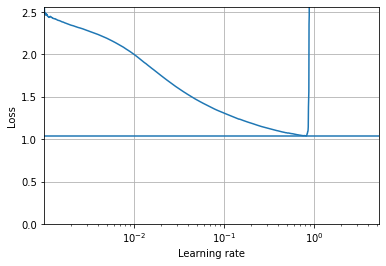

In [113]:
import matplotlib.pyplot as plt

plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [29]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=3e-1), metrics=['accuracy'])

In [33]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('NN-mnist.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
tensor_board_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=20, validation_data= (X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb, tensor_board_cb])

Epoch 1/20


2022-07-16 22:56:09.615928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9263

2022-07-16 22:56:19.050535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.2366 - accuracy: 0.9263 - val_loss: 0.1017 - val_accuracy: 0.9722
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0951 - accuracy: 0.9703 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0676 - accuracy: 0.9782 - val_loss: 0.0939 - val_accuracy: 0.9716
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9842 - val_loss: 0.0752 - val_accuracy: 0.9798
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0725 - val_accuracy: 0.9800
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0308 - accuracy: 0.9894 - val_loss: 0.0714 - val_accuracy: 0.9818
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.0861 - val_accuracy: 0.9764
Ep

In [35]:
model = keras.models.load_model("NN-mnist.h5") # rollback to best model
model.save("NN-mnist.h5")

In [36]:
model.evaluate(X_test, y_test)

 43/313 [===>..........................] - ETA: 1s - loss: 0.1216 - accuracy: 0.9731

2022-07-16 22:59:03.016943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.0816 - accuracy: 0.9794


[0.08162765204906464, 0.9794000387191772]

In [39]:

%tensorboard --logdir=./my_mnist_logs --port=6006

Reusing TensorBoard on port 6006 (pid 72814), started 0:10:12 ago. (Use '!kill 72814' to kill it.)